> ###  ***Submitted by: Malaika Ahmed***

# ***🔴 Task 28: Exploring Cross-Validation, Overfitting, and Underfitting***

lude:


- Cross-validation is a technique used to assess the performance and generalization ability of a model by partitioning the dataset into multiple subsets or folds.
  
- Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts its performance on new, unseen data. 

- Underfitting occurs when a model is too simple to capture the underlying patterns in the data.  

***

 # <span style='color:Red'>  ***Cross-Validation*** </span>


Cross-Validation is basically a resampling technique to make our model sure about its efficiency and accuracy on the unseen data. In short, Model Validation technique, up for other applications.

> ***Bunch of train/test splits —> testing accuracy for each split — >average them***


- It partitions our data into train/test in such a way that the previous set won’t repeat and for each set training and testing is performed once.
- Each partition (aka fold) is of equal size. Can say, every datapoint plays as train and test in its life journey. This is basic functionality of cross-validation.
- It prevents over-fitting and under-fitting by choosing optimal value of K.

### ***Quick steps for implementing Cross-Validation***

1. Divide data into K partitions. These partitions will be of equal size.
2. Treat Fold-1 as test fold while K-1 as train folds.
3. Compute score of test-fold.
4. Repeat step 3 for all folds taking another fold as test while remaining as train.
5. Take average of scores of all the folds.

***

 # <span style='color:Blue'>  ***Types of Cross-Validation*** </span>




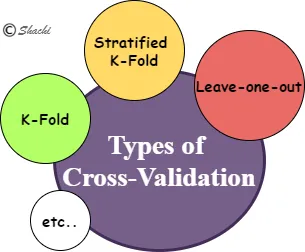




# 1. ***Leave-one-out Cross-Validation (LOOCV)***

This is very old technique which is replaced by k-fold and stratified k-fold but still useful in certain scenarios. Data is partitioned into blocks representing each with 1 record as test while remaining as train. Each and every record is treated as test and those many iterations to evaluate on each.Data of 20 records means 20 partitions, each having one record. This leads to 20 iterations of training and evaluating.
In 1st iteration, model is tested on 1st block (fold) and tested on remaining 19 folds, giving out an accuracy. In the next iteration, another block having next record as test set while remaining as train, gives another accuracy. LOOCV makes testing and training on all 20 records in 20 iterations, hence expensive computational power. Average of all sets are then computed and thrown as a final accuracy aka k-fold score.


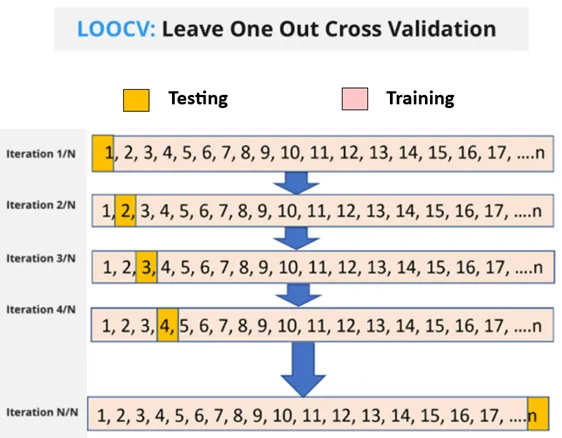

### ***Example***

Let’s say we have a dataset of 100 samples and we want to train a model to predict if a person has diabetes based on their age and BMI.
In Leave-One-Out cross-validation, we would:

- Select 1 sample as the test set and use the remaining 99 samples as the training set. Train the model on the training set and evaluate its performance on the test set.

- Select another sample as the test set and use the remaining 99 samples as the training set. Train the model again on the new training set and evaluate its performance on the new test set.

- Repeat this process 99 times, each time using a different sample as the test set.

***

 # <span style='color:Blue'>  ***Implementing Leave-one-out Cross-Validation (LOOCV)*** </span>


In [373]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression 
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.metrics import roc_curve
import warnings



In [374]:
df=pd.read_csv("heart.csv")


In [375]:
df.isnull().sum().sum()

0

In [376]:
df.duplicated().sum()

723

In [377]:
df.drop_duplicates(inplace=True)

In [378]:
df.duplicated().sum()

0

In [379]:
np.isinf(df).sum().sum()


0

In [380]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [381]:
X=df.iloc[:,0:-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [382]:


y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [383]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [384]:
loocv = LeaveOneOut()


In [385]:
LCV = cross_val_score(model, X_scaled, y, cv=loocv)
averageLCV = np.mean(LCV)

In [386]:
print("LeaveOneOut Score \n", LCV)
print("Average LeaveOneut Score: ", averageLCV)

LeaveOneOut Score 
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan na

***

***

***

# 2. ***K-Fold Cross-Validation***

K-fold cross validation is a method of evaluating the performance of a machine learning model by splitting the data into k subsets or “folds” of roughly equal size. The model is trained on k-1 of the folds and tested on the remaining fold. This process is repeated k times, with each fold being used as the test set once. The performance of the model is then averaged across all k iterations. This gives an estimate of how well the model is likely to perform on new, unseen data.


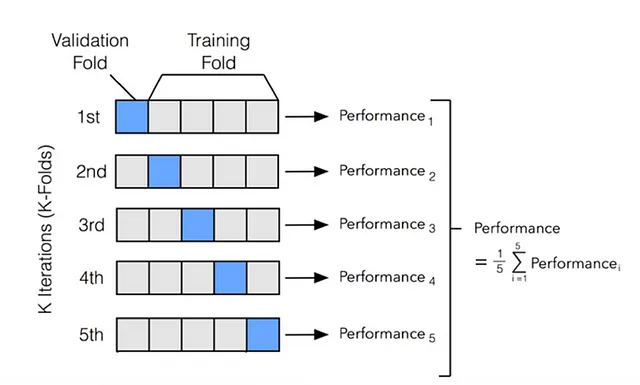

### ***Example***

- Suppose we have a dataset of 100 samples, and we want to train a model to predict if a person has diabetes based on their age and BMI. We can use k-fold cross validation to evaluate the performance of the model. We can split the data into 10 folds, meaning that each fold will have 10 samples.

- In the first iteration, we will use the first 9 folds (90 samples) to train the model and the remaining fold (10 samples) to test the model. We will record the performance of the model (e.g. accuracy, precision, recall, etc.) In the second iteration, we will use the second fold as the test set, and the rest of the 9 folds as the training set. We will again record the performance of the model.

- This process will repeat until all the 10 folds have been used as the test set once. After all the iterations, we will average the performance of the model across all 10 iterations. This will give us an estimate of how well the model is likely to perform on new, unseen data.

***

 # <span style='color:Blue'>  ***Implementing K-Fold Cross-Validation*** </span>



In [387]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [388]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [389]:
# Set up the instance kf with 5 splits. 
# the shuffle=True option randomizes the order of the data points, 
# random_state=42 ensures that this shuffling is consistent across multiple runs. 
k = 5 
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [390]:
LR = LinearRegression()

In [391]:
# cross_val_score function to evaluate the model using the dataset X and target y. 
#The cross-validation is conducted using the Kfold instance kf, and the model’s performance is measured using the R² score. 


CVS = cross_val_score(LR, X, y, cv=kf)
averageCVS = np.mean(CVS) 

In [392]:
print("Cross Validation Score for each of 5 folds \n", CVS)
print("\n Average Cross Validation score  for 5 folds \n", averageCVS)


Cross Validation Score for each of 5 folds 
 [0.37038643 0.43067811 0.60706372 0.28909205 0.42270734]

 Average Cross Validation score  for 5 folds 
 0.4239855286549508


***

***

***

# 3. ***Stratified k-fold cross validation***
Stratified k-fold cross validation is a method of cross-validation that ensures that the proportion of samples for each class is roughly the same in each fold. This is useful when the class distribution is imbalanced, meaning that there are different number of samples for each class.


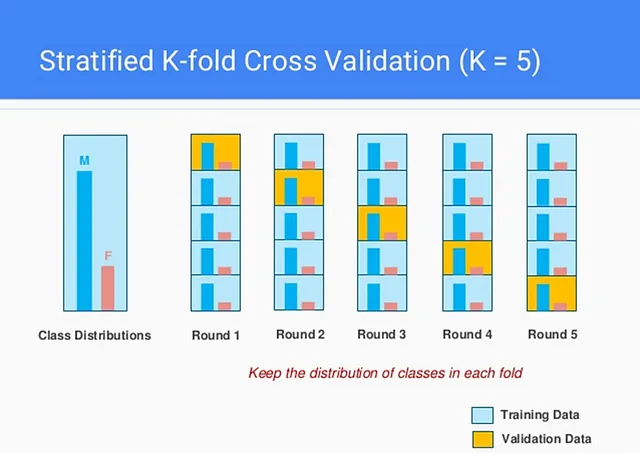


### ***How Stratified K-Fold Cross-Validation Works***
- Stratified K-Fold Cross-Validation addresses the issue  Imbalanced Data by ensuring that each fold is a good representative of the whole dataset.

- It works by preserving the original distribution of classes in each fold, ensuring that the proportions between classes are conserved.

- This approach makes sure that each class is adequately represented across all folds, allowing for a fair and accurate evaluation of the model’s performance.

### ***Example***

- Suppose we have a dataset of 1000 samples, and we want to train a model to classify the samples as either “A” or “B” class. The dataset has 600 samples of class “A” and 400 samples of class “B”. We want to use k-fold cross validation to evaluate the performance of the model, where k = 5.

- In regular k-fold cross validation, the data is randomly split into 5 subsets or “folds” of roughly equal size (200 samples per fold). However, this could lead to a situation where all samples of class “A” end up in one fold and all samples of class “B” end up in another fold. This would not be an accurate representation of the model’s performance on unseen data.

- With stratified k-fold cross validation, we first divide the data into 5 folds based on the class distribution. This means that each fold will have roughly 120 samples of class “A” and 80 samples of class “B”. This way, the proportion of samples for each class is roughly the same in each fold.

- The model is then trained on 4 folds and tested on the remaining fold, this process is repeated 5 times with each fold being used as the test set once. The performance of the model is then averaged across all 5 iterations. This gives an estimate of how well the model is likely to perform on new, unseen data.

***

 # <span style='color:Blue'>  ***Implementing Stratified K-Fold Cross-Validation*** </span>


In [393]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [394]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [395]:
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)

In [396]:
SCV = cross_val_score(model, X, y, cv = skf)
averageSCV = np.mean(scores) 

print("Stratified Cross Validation Score \n", SCV)
print("\n Mean Stratified Cross Validation \n", averageSCV )


Stratified Cross Validation Score 
 [-0.10506151  0.13270934  0.16840013  0.23551282  0.18001972]

 Mean Stratified Cross Validation 
 nan


***

***

***

 # <span style='color:Red'>  ***Overfitting and Underfitting*** </span>
 
 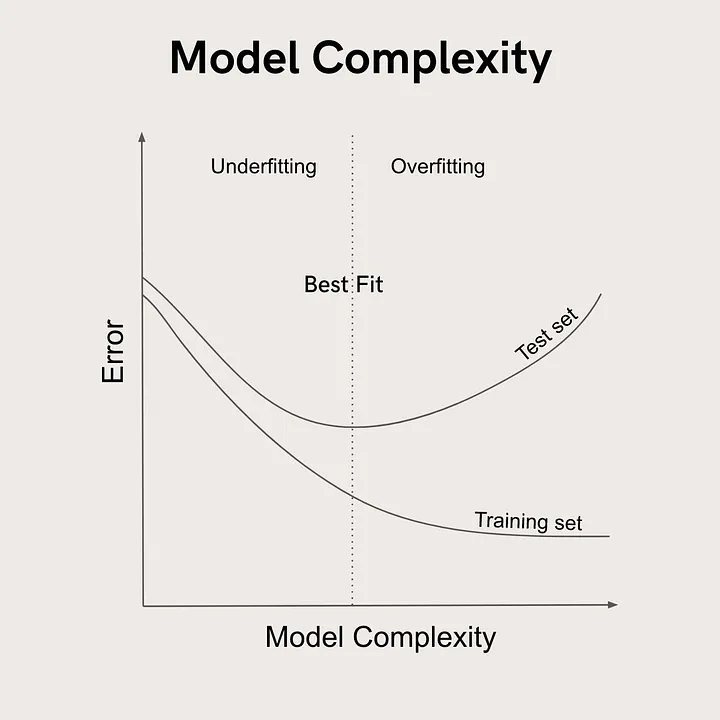
 
 In Machine Leaning, model performance is evaluated on the basis of two important parameters. Accuracy and Generalisation. Accuracy means how well model predicts the right target value and Generalisation means how well model behaves on seen and unseen data.

Machine learning models are trained on given training data and performance is evaluated on the unseen test data. Model is considered right when it behaves nearly same way on training and test data with highest accurac

y.
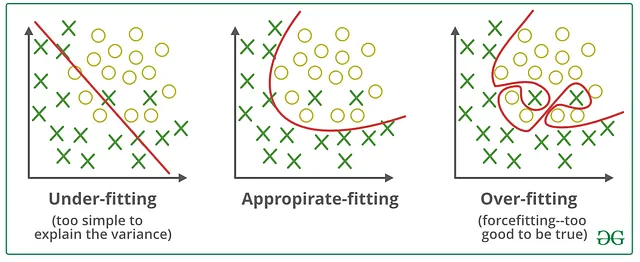

## ***Key Terminologies***

***Bias:*** Bias refers to the error due to overly simplistic assumptions in the learning algorithm. These assumptions make the model easier to comprehend and learn but might not capture the underlying complexities of the data. It is the error due to the model’s inability to represent the true relationship between input and output accurately. When a model has poor performance both on the training and testing data means high bias because of the simple model, indicating underfitting.

***Variance***: Variance, on the other hand, is the error due to the model’s sensitivity to fluctuations in the training data. It’s the variability of the model’s predictions for different instances of training data. High variance occurs when a model learns the training data’s noise and random fluctuations rather than the underlying pattern. As a result, the model performs well on the training data but poorly on the testing data, indicating overfitting.

***

 # <span style='color:Red'>  ***Underfitting*** </span>
- Underfitting means model has low accuracy score on training data and test data both.

- Underfitting happens when algorithm used to build prediction model is very simple and not able to learn complex pattern from the training data. In that case accuracy will be on lower side on seen training data as well as unseen test data.

- Underfitting also referred as High Bias.
  
- Generally, It happens with Linear Algorithms. A underfit model makes incorrect assumptions about the dataset to make the target function easier to learn. If training data distribution is non linear and you apply linear algorithm to build the prediction model, in that case model would not be able to learn non linear relationship between target value and predictors( features) and accuracy will suffer.

- Underfit Model is very simple because of the assumptions made about the data( which may or may not be true) pays very little attention to the training data and oversimplifies the model. High Bias model always leads to high error on training as well as on test data.
- In a simple language, your model is very simple and not able to learn the complex pattern (or relationship in data) from the data to make right prediction




## ***Example***

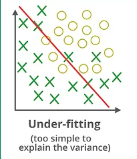


Image represents model is Underfit. Data given for training is non linear and you are applying linear regression on the data for modelling. Model has high error because maximum of the data points are far from the line so not able to capture the existing pattern from the data.In this case model built is not right and will have low prediction accuracy.

### ***Causes of Underfitting***
- Using an overly simple model with too few parameters.
- Data used for training is not cleaned and contains noise (garbage values) in it
- Insufficient training or too few iterations.
- Excessive regularization, which penalizes model complexity.

### ***Signs of Underfitting***
- High training error (low accuracy, high loss).
- High validation error.
- The model performs poorly on new, unseen data.

### ***How to Address Underfitting***
- Increase model complexity by adding more parameters or using a more complex architecture.
- Increase the number of features in the dataset
- Train the model for more epochs.
* Reduce the strength of regularization, or remove it entirely.
- Use more relevant features or preprocess the data differently.

***

 # <span style='color:Blue'>  ***Implementing Underfitting*** </span>


In [471]:
df1=pd.read_csv("Position_Salaries.csv")

In [472]:
df1

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [473]:
X=df1.iloc[:,1].values

In [474]:
y=df1.iloc[:,2].values

In [475]:
X=X.reshape(-1,1)

In [476]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [477]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [479]:
LR=LinearRegression()

In [480]:
LR.fit(X_train,y_train)

LinearRegression()

In [484]:
y_pred_train = LR.predict(X_train)  # Predictions for training data
y_pred_test = LR.predict(X_test)    # Predictions for test data

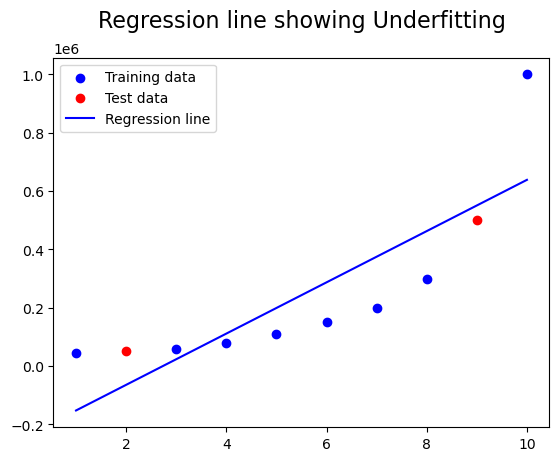

In [482]:

# Plotting
plt.scatter(X_train, y_train, color='blue', label='Training data')  
plt.scatter(X_test, y_test, color='red', label='Test data')        

# Plot the regression line over the range of X_train and X_test
# Ensure the line covers the range of both training and test data
X_range = np.linspace(min(X_train.min(), X_test.min()), max(X_train.max(), X_test.max()), 100).reshape(-1, 1)
y_range = LR.predict(X_range)
plt.plot(X_range, y_range, color='blue', label='Regression line')

plt.title("Regression line showing Underfitting", pad=22, fontsize=16)
plt.legend()
plt.show()


Model is performing poor on training data

### Calculating Accuracy Score

In [488]:
from sklearn.metrics import mean_squared_error, r2_score

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training R² Score: {r2_train:.2f}')
print(f'Test R² Score: {r2_test:.2f}')

Training R² Score: 0.64
Test R² Score: 0.85


### Results

Accuracy Score of Training data 0.64 is less than accuracy score of testing data 0.85.This confirms that in underfitting model performs well on testing but poor on training

***

***

 # <span style='color:Red'>  ***Overfitting*** </span>
- Overfitting means model has High accuracy score on training data but low score on test data.Overfitting means your model is not Generalised.

- Overfitting happens when algorithm used to build prediction model is very complex and it has over learned the underlying patterns in training data.
- Overfitting is error from sensitivity to small fluctuations in the training set.
- Overfitting can cause an algorithm to model the random noise in the training data, rather than the intended result.

- Overfitting also referred as High Variance

- In supervised learning, overfitting happens when algorithms(Non Linear Algorithms) are strongly influenced by the specifics of the training data and try to learn patterns which are noisy and not generalized and only limited to training data set.

- In a simple language,model performs well on training data but not on test data. Model Memorizes the data insteadof learning.

### ***Example***

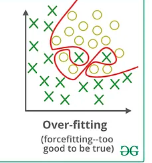


Image represents model is Overfit. Data given for training is non linear and you are trying linear model for classification. As you can observe, because of higher degree features, decision boundary has curved too much to classify each and every training example correctly. In this case there will be minimum error on training data because model has over learned the patterns and resulting in to zero classification error. But on test data when data distribution will differ from the training data, prediction error will increase because line is curved to suit the training data only and not generalised to classify the unseen data.

### ***Reasons for Overfitting***
- Data used for training is not cleaned and contains noise (garbage values) in it
- The model has a high variance
- The size of the training dataset used is not enough
- The model is too complex

### ***Ways to Tackle Overfitting***
- Using K-fold cross-validation
- Using Regularization techniques such as Lasso and Ridge
- Training model with sufficient data
- Adopting ensembling techniques

***

 # <span style='color:Blue'>  ***Implementing Overfitting*** </span>


In [489]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree

In [490]:
X, y = make_classification(n_samples=500, n_features=20, n_informative=10, n_redundant=10, random_state=42)


In [491]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [492]:
X.shape

(500, 20)

In [493]:
y.shape

(500,)

In [494]:

# Generate data
X, y = make_classification(n_samples=500, n_features=20, n_informative=10, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [495]:
# Define and fit the model
overfit_model = DecisionTreeClassifier()
overfit_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [499]:
# Make predictions
y_train_pred = overfit_model.predict(X_train)
y_test_pred = overfit_model.predict(X_test)

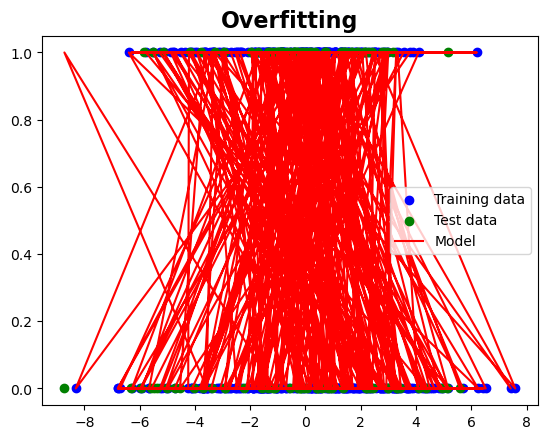

In [500]:
# Plotting
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training data')  # Use the first feature of X_train
plt.scatter(X_test[:, 0], y_test, color='green', label='Test data')  # Use the first feature of X_test
plt.plot(X[:, 0], overfit_model.predict(X), color='red', label='Model')  # Use the first feature of X
plt.legend()
plt.title('Overfitting', weight='bold', fontsize=16)
plt.show()

### Calculating Accuracy Score


In [502]:

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training R² Score: {r2_train:.2f}')
print(f'Test R² Score: {r2_test:.2f}')

Training R² Score: 1.00
Test R² Score: -0.04


### Results

Accuracy Score of Testing data 0. is less than accuracy score of testing data 0..This confirms that in Overfitting model performs well on Training but poor on testing.